# Compile all model results

In [2]:
import pandas as pd
from glob import glob
from os.path import join, basename
from matplotlib import pyplot as plt
import seaborn as sns


IMPORT DES RESULTATS

In [85]:
MODELS = "/home/tbarba/projects/MultiModalBrainSurvival/outputs"

new_results = glob(join(MODELS, "*/*/multivariate/*WB*over*csv"))
old_results = glob(join(MODELS, "*/*/*/multivariate/*WB*over*csv"))
radiomics = glob(join(MODELS, "*/*/multivariate/*RAD*over*csv"))
wb = new_results + old_results + radiomics


def import_df(file):


    if "RAD" in file:
        model = "radiomics"
        architecture = "radiomics"
        segmentation = True
        dataset = file.split("/")[7].split("_")[1]
    else:
        model = file.split("/")[7] if file.split("/")[7] != "other" else file.split("/")[8]
        architecture = file.split("/")[6]
        dataset = model.split("_")[1]
        segmentation = True if "_segm" in file else False

    df = pd.read_csv(file)
    df["architecture"] = architecture
    df["dataset"] = dataset
    df["model"] = model
    df["segmentation"] = segmentation
    # df = df.set_index(["architecture", "model", "dataset"])

    return df


df = pd.concat([import_df(d) for d in wb], axis=0)#.set_index(["dataset", "architecture"]).sort_index()
df["performance"] = df["performance"].astype(float)

ukb_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UKBIOBANK/metadata/0-variable_list.csv", index_col="category").sort_index()
tcga_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/TCGA/metadata/0-variable_list.csv", index_col="category").sort_index()
upenn_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UPENN/metadata/0-variable_list.csv", index_col="category").sort_index()
ucsf_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UCSF/metadata/0-variable_list.csv", index_col="category").sort_index()

variables = pd.concat([ukb_vars, tcga_vars, upenn_vars, ucsf_vars], axis=0).query("keep_model")["var"].reset_index()

In [86]:
df = pd.merge(df, variables, left_on="variable", right_on="var").drop("var", axis=1)

In [95]:
set([f for f in df.model])

{'AE_TCGA_segm',
 'AE_UCSF_segm',
 'AE_UKB_segm',
 'AE_UPENN_segm',
 'UNet_TCGA',
 'UNet_TCGA_segm',
 'UNet_UCSF_segm',
 'UNet_UKB_5b4f',
 'UNet_UKB_6b4f',
 'UNet_UKB_6b8f',
 'UNet_UKB_segm',
 'UNet_UPENN_segm',
 'radiomics',
 'uVAE_UCSF_b1e-3',
 'uVAE_UKB_b1e-3'}

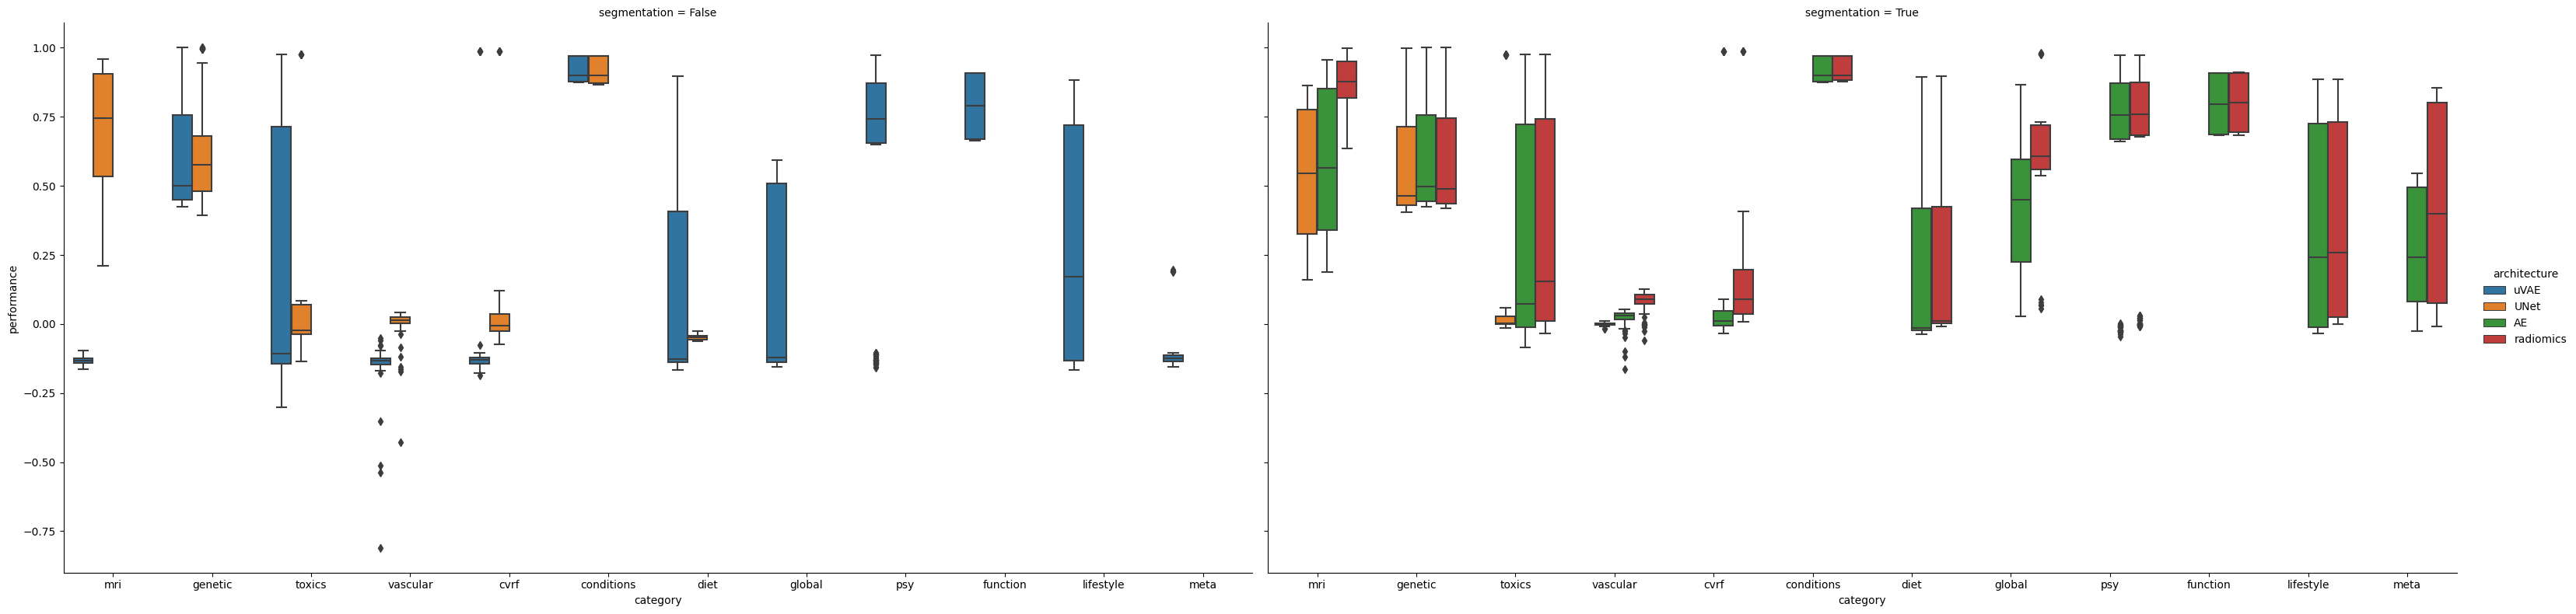

In [91]:
uk_results = df.query("dataset == 'UKB'")
g = sns.catplot(x="category", y="performance", hue="architecture", col="segmentation", data=uk_results, kind="box", height=8, aspect=2)


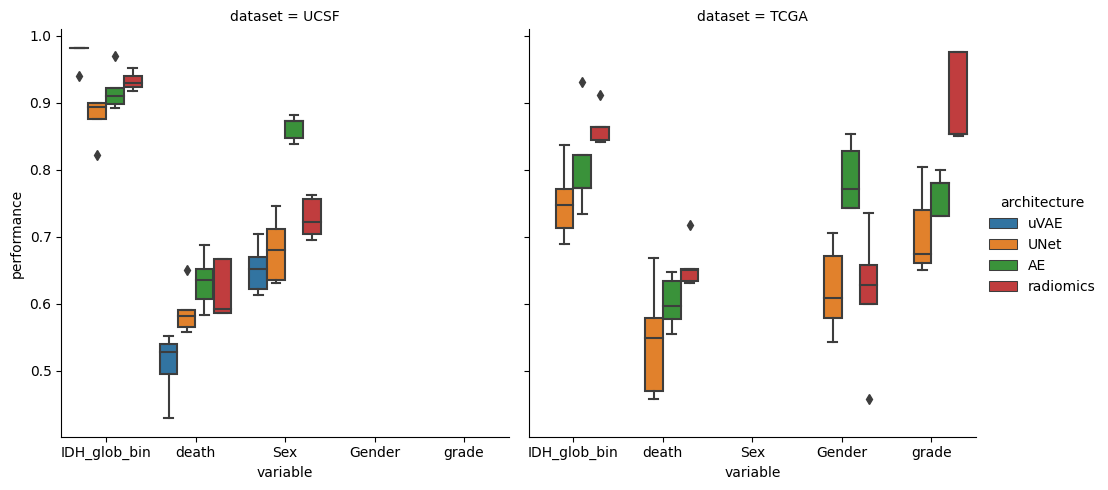

In [35]:

cancer = df.query("dataset in ['UCSF','TCGA']")
g = sns.catplot(x="variable", y="performance", hue="architecture", col="dataset", data=cancer, kind="box")


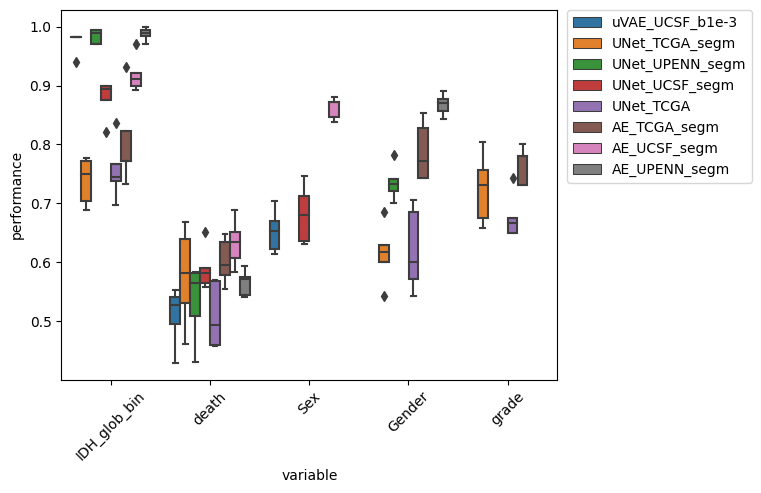

In [ ]:
g = sns.boxplot(data=cancer, x="variable",y="performance", hue="model")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

,variable,split,performance,metric,ibs,variance,num_classes,N,missing_rate,model,restored,architecture,dataset
0,IDH_glob_bin,1,0.9822,f1_weighted,NaN,1.0,2.0,169,0.00,uVAE_UCSF_b1e-3,False,uVAE,UCSF
0,IDH_glob_bin,1,0.97,f1_weighted,NaN,1.0,2.0,200,0.16,UNet_UPENN_segm,False,UNet,UPENN
0,IDH_glob_bin,1,0.8994,f1_weighted,NaN,1.0,2.0,169,0.00,UNet_UCSF_segm,False,UNet,UCSF
0,death,1,0.4577,NaN,0.233390,NaN,NaN,32,0.01,UNet_TCGA,False,UNet,TCGA
0,death,1,0.5961,NaN,0.288166,NaN,NaN,34,0.01,AE_TCGA_segm,False,AE,TCGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,grade,4,0.7317,f1_weighted,NaN,1.0,2.0,41,0.00,UNet_TCGA_segm,False,UNet,TCGA
18,grade,4,0.6667,f1_weighted,NaN,1.0,2.0,39,0.00,UNet_TCGA,False,UNet,TCGA
19,grade,5,0.8,f1_weighted,NaN,1.0,2.0,40,0.00,AE_TCGA_segm,False,AE,TCGA
19,grade,5,0.675,f1_weighted,NaN,1.0,2.0,40,0.00,UNet_TCGA_segm,False,UNet,TCGA
